In [1]:
# Importing librairies
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = pd.DataFrame(dataset['train'])

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


Demand of certain job titles, over the course of a year, for United states 

C:\Users\Fils GUEDEGBE\AppData\Local\Temp\ipykernel_16264\4145510582.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['month'] = df_filtered['job_posted_date'].dt.month_name()


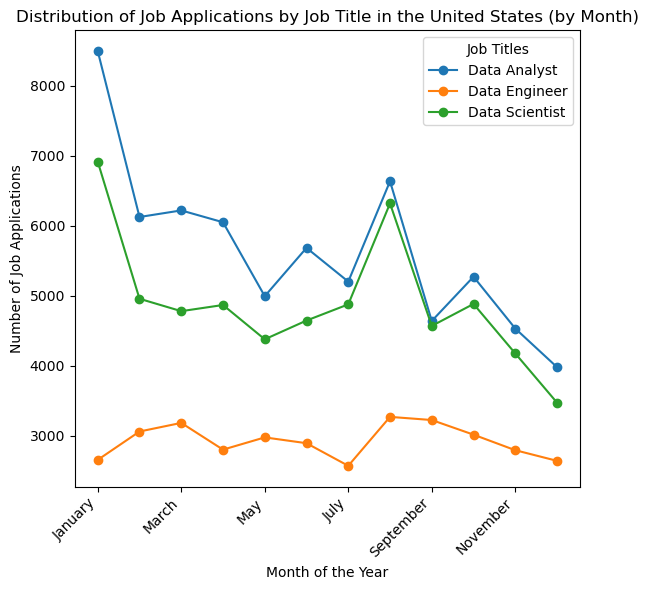

In [7]:
# Filter the data to keep only the specified jobs and the United States
jobs = ['Data Scientist', 'Data Analyst', 'Data Engineer']
df_filtered = df[(df['job_title_short'].isin(jobs)) & (df['job_country'] == 'United States')]

# Step 1: Create a column for the month of the job posting date
df_filtered['month'] = df_filtered['job_posted_date'].dt.month_name()

# Step 2: Count the number of job applications by month and job title
job_counts = df_filtered.groupby(['month', 'job_title_short']).size().unstack(fill_value=0)

# Step 3: Reindex to ensure all months are represented in the correct order
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
job_counts = job_counts.reindex(months_order)

# Step 4: Plot a line graph
job_counts.plot(kind='line', marker='o', figsize=(6, 6))

# Customizing and displaying the graph
plt.title('Distribution of Job Applications by Job Title in the United States (by Month)')
plt.xlabel('Month of the Year')
plt.ylabel('Number of Job Applications')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Titles')
plt.tight_layout()
plt.show()


THE FOLLOWING CODE ALSO WORKS. HERE IT IS WAY MORE DETAILED BECAUSE WE CAN DO THE ANALYSIS ON WHATEVER JOBS WE WANT.

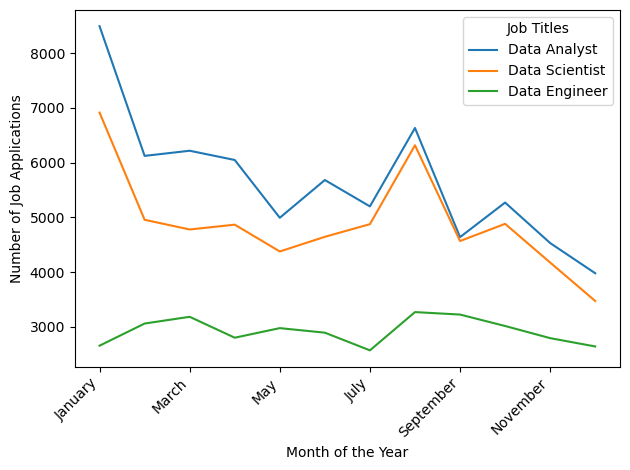

In [5]:
# Extracting months from 'job_posted_date'

df_ex = df[df['job_country'] == 'United States'].copy()
df_ex['month'] = df['job_posted_date'].dt.strftime('%B') # for the months

pivot_table = df_ex.pivot_table(
    index ='month',                
    columns ='job_title_short',    
    aggfunc ='size'              
)
pivot_table.reset_index(inplace=True)
pivot_table['month_number'] = pd.to_datetime(pivot_table['month'], format='%B').dt.month
pivot_table.sort_values(by ='month_number', inplace=True)
pivot_table.set_index('month',inplace=True)
pivot_table.drop(columns ='month_number')

# Targeting the top 3 jobs
top_3 = df_ex['job_title_short'].value_counts().head(3).index
pivot_table_plot=pivot_table.loc[:,top_3]

# Plotting the chart
pivot_table_plot.plot(kind='line')
plt.xlabel('Month of the Year')
plt.ylabel('Number of Job Applications')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Titles')
plt.tight_layout()
